In [1]:
import os
import itertools
import numpy as np
import operator
import math
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [3]:
doctopic_triples = []
mallet_docnames = []

In [4]:
#here you can put the strings you want to get rid off when showing the titles
list_authors_to_replace=['Zola-Emile','Dumas-Alexandre-Pere','Dumas-Alexandre','Balzac-Honore-de','Verne-Jules','Sand-George','Flaubert-Gustave']
list_authors_to_find=['Giono-Jean']
argsfig='giono_1_last'

In [5]:
def replace_all(text, dic):
    for i in dic:
        text = text.replace(i, "")
    return text

In [6]:
list_chaps=list()

In [7]:
with open("/home/odysseus/Bureau/ANR/code/topic_modelling_mallet/results/doc-topics-chaps.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        docname = os.path.basename(docname)
        if docname.split('_')[1] in list_authors_to_find and ('_1.' in docname or '_last.' in docname):
        #if docname.split('_')[1] in list_authors_to_find and ('_1.' in docname or '_'+str(max(list_chaps))+'.' in docname):
            #docname=replace_all(docname, list_authors_to_replace)
            docname=docname[5:len(docname)-4]
            mallet_docnames.append(docname)
            print(docname)
            for topic, share in grouper(2, values):
                triple = (docname, int(topic), float(share))
                doctopic_triples.append(triple)

Giono-Jean_Le-Hussard-sur-le-toit_14_last
Giono-Jean_Batailles-dans-la-montagne_1
Giono-Jean_Regain_1
Giono-Jean_Batailles-dans-la-montagne_12_last
Giono-Jean_Les-recits-de-la-demi-brigade_7_last
Giono-Jean_Le-Hussard-sur-le-toit_1
Giono-Jean_Les-recits-de-la-demi-brigade_1
Giono-Jean_Regain_9_last


In [8]:
print(doctopic_triples)

[('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 13, 0.1056338028169014), ('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 3, 0.09154929577464789), ('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 18, 0.06338028169014084), ('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 10, 0.06338028169014084), ('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 8, 0.06338028169014084), ('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 19, 0.04929577464788732), ('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 16, 0.04929577464788732), ('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 14, 0.04929577464788732), ('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 7, 0.04929577464788732), ('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 4, 0.04929577464788732), ('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 1, 0.04929577464788732), ('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 17, 0.035211267605633804), ('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 15, 0.035211267605633804), ('Giono-Jean_Le-Hussard-sur-le-toit_14_last', 12, 0.035211267605633

In [9]:
mallet_docnames = sorted(mallet_docnames)

In [10]:
num_docs = len(mallet_docnames)

In [11]:
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

In [12]:
num_topics = len(doctopic_triples) // len(mallet_docnames)
print(len(doctopic_triples))
print(num_topics)

160
20


In [13]:
doctopic = np.zeros((num_docs, num_topics))

In [14]:
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [15]:
novel_names = []

In [16]:
for fn in mallet_docnames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    novel_names.append(name)
print(len(novel_names))

8


In [17]:
novel_names = np.asarray(novel_names)

In [18]:
doctopic

array([[ 0.00366089,  0.03603083,  0.00250482,  0.17129094,  0.00289017,
         0.00250482,  0.01290944,  0.0017341 ,  0.01445087,  0.01021195,
         0.00635838,  0.00211946,  0.06878613,  0.03757225,  0.00867052,
         0.07418112,  0.00404624,  0.02755299,  0.49807322,  0.01445087],
       [ 0.05491329,  0.04868831,  0.018008  ,  0.25767008,  0.00200089,
         0.00600267,  0.01133837,  0.00644731,  0.00111161,  0.00689195,
         0.01133837,  0.00644731,  0.08603824,  0.06380614,  0.0211205 ,
         0.1247221 ,  0.00644731,  0.0264562 ,  0.22876834,  0.01178301],
       [ 0.04992711,  0.01712828,  0.04190962,  0.1388484 ,  0.03097668,
         0.02077259,  0.03826531,  0.0521137 ,  0.00255102,  0.02295918,
         0.05721574,  0.01494169,  0.1053207 ,  0.05284257,  0.02150146,
         0.02879009,  0.03607872,  0.00838192,  0.22048105,  0.03899417],
       [ 0.03521127,  0.04929577,  0.03521127,  0.0915493 ,  0.04929577,
         0.03521127,  0.03521127,  0.04929577,  

In [19]:
doctopic_orig = doctopic.copy()

In [20]:
num_groups = len(set(novel_names))
print(num_groups)

8


In [21]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [22]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [23]:
doctopic = doctopic_grouped

In [24]:
doctopic

array([[ 0.00366089,  0.03603083,  0.00250482,  0.17129094,  0.00289017,
         0.00250482,  0.01290944,  0.0017341 ,  0.01445087,  0.01021195,
         0.00635838,  0.00211946,  0.06878613,  0.03757225,  0.00867052,
         0.07418112,  0.00404624,  0.02755299,  0.49807322,  0.01445087],
       [ 0.05491329,  0.04868831,  0.018008  ,  0.25767008,  0.00200089,
         0.00600267,  0.01133837,  0.00644731,  0.00111161,  0.00689195,
         0.01133837,  0.00644731,  0.08603824,  0.06380614,  0.0211205 ,
         0.1247221 ,  0.00644731,  0.0264562 ,  0.22876834,  0.01178301],
       [ 0.04992711,  0.01712828,  0.04190962,  0.1388484 ,  0.03097668,
         0.02077259,  0.03826531,  0.0521137 ,  0.00255102,  0.02295918,
         0.05721574,  0.01494169,  0.1053207 ,  0.05284257,  0.02150146,
         0.02879009,  0.03607872,  0.00838192,  0.22048105,  0.03899417],
       [ 0.03521127,  0.04929577,  0.03521127,  0.0915493 ,  0.04929577,
         0.03521127,  0.03521127,  0.04929577,  

In [25]:
N, K = doctopic.shape
print(K)

20


In [26]:
ind = np.arange(N)

In [27]:
width = 0.5

In [28]:
plt.rcParams["figure.figsize"] = [16,9]

In [29]:
plt.bar(ind, doctopic[:,0], width=width)

<Container object of 8 artists>

In [30]:
plt.xticks(rotation=90)
plt.xticks(ind + width/2, novel_names)

([<matplotlib.axis.XTick at 0x7f9717ffdef0>,
 <a list of 8 Text xticklabel objects>)

In [31]:
plt.title('Share of Topic #0')

Text(0.5,1,'Share of Topic #0')

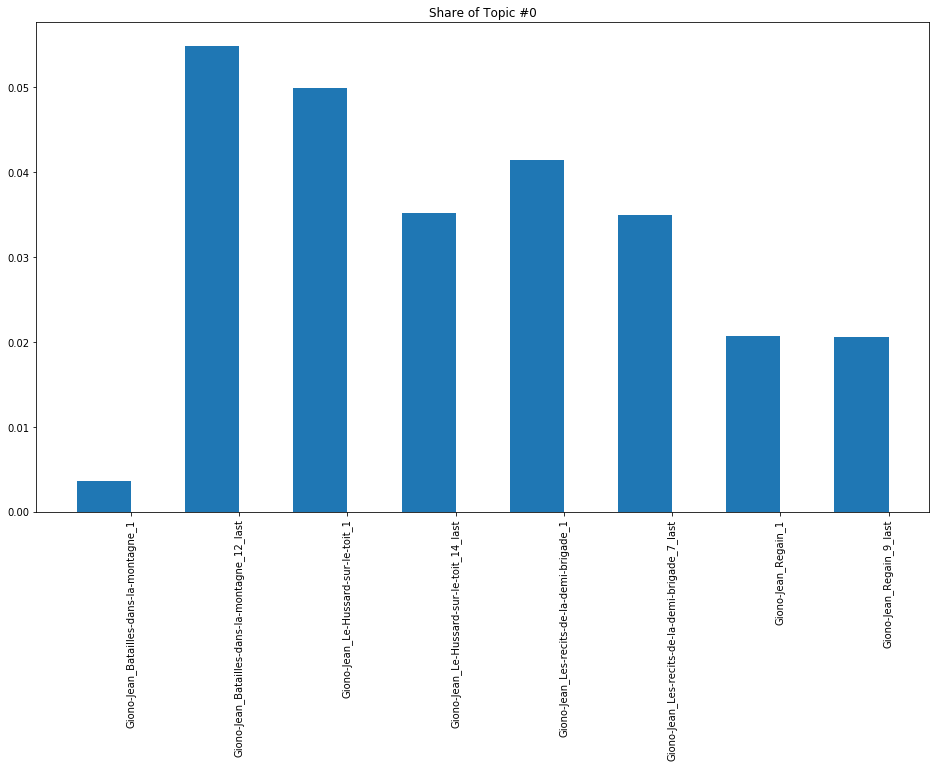

In [32]:
plt.show()

In [33]:
plots = []

In [34]:
height_cumulative = np.zeros(N)

In [35]:
fig=plt.figure()

In [36]:
for k in range(K):
    color = plt.cm.tab20(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)

In [37]:
plt.ylim((0, 1))

(0, 1)

In [38]:
plt.ylabel('Topics')

Text(0,0.5,'Topics')

In [39]:
plt.title('Topics in novels')

Text(0.5,1,'Topics in novels')

In [40]:
list_topics =['espace domestique', 'vie conjugale', 'affaires/argent/mondanités', '?', 'noblesse', 'justice/crime', 'réflexions sur l\'existence', 'police/intrigue/bureaucratie', 'corps public/théâtre/festivités', 'temps','armée','?','nature/éléments/cosmos','voyage','sentiment','corps (morbide ?)','marine','famille','nature/végétal','religion']

In [41]:
plt.xticks(rotation=90)
plt.xticks(ind+width/2, novel_names)
index=1
for name in novel_names:
    print('numero '+str(index))
    print(name)
    index+=1

numero 1
Giono-Jean_Batailles-dans-la-montagne_1
numero 2
Giono-Jean_Batailles-dans-la-montagne_12_last
numero 3
Giono-Jean_Le-Hussard-sur-le-toit_1
numero 4
Giono-Jean_Le-Hussard-sur-le-toit_14_last
numero 5
Giono-Jean_Les-recits-de-la-demi-brigade_1
numero 6
Giono-Jean_Les-recits-de-la-demi-brigade_7_last
numero 7
Giono-Jean_Regain_1
numero 8
Giono-Jean_Regain_9_last


In [42]:
plt.yticks(np.arange(0, 1, 10))

([<matplotlib.axis.YTick at 0x7f970f973d30>],
 <a list of 1 Text yticklabel objects>)

In [43]:
#Pour cette expérience, topic 0 : aventure ; topic 1 : argent ; topic 2 : mort
topic_labels = [k for k in list_topics]

In [44]:
plt.legend([p[0] for p in plots], topic_labels,bbox_to_anchor=(1,1), loc="upper left")

In [45]:
fig.savefig(argsfig+'.png',bbox_inches='tight')
plt.close(fig)